Dane pochodzą ze strony: https://www.drivendata.org/competitions/2/warm-up-predict-blood-donations/

Na podstawie danych treningowych zawierających: liczbę miesiący od ostatniego oddania krwi, liczbę wszystkich oddań, łączną ilość oddanej krwi, liczbę miesięcy od pierwszego oddania oraz informacji czy oddano krew w marcu 2007 należy przewidzieć prawdopodobieństwo oddania krwi dla dawców opisanych w danych testowych.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [156]:
data = pd.read_csv("training.csv")
data = data.drop(columns='id')
data.head()

,Months_since_Last_Donation,Number_of_Donations,Total_Volume_Donated,Months_since_First_Donation,Made_Donation
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [157]:
data.describe()

,Months_since_Last_Donation,Number_of_Donations,Total_Volume_Donated,Months_since_First_Donation,Made_Donation
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583
std,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


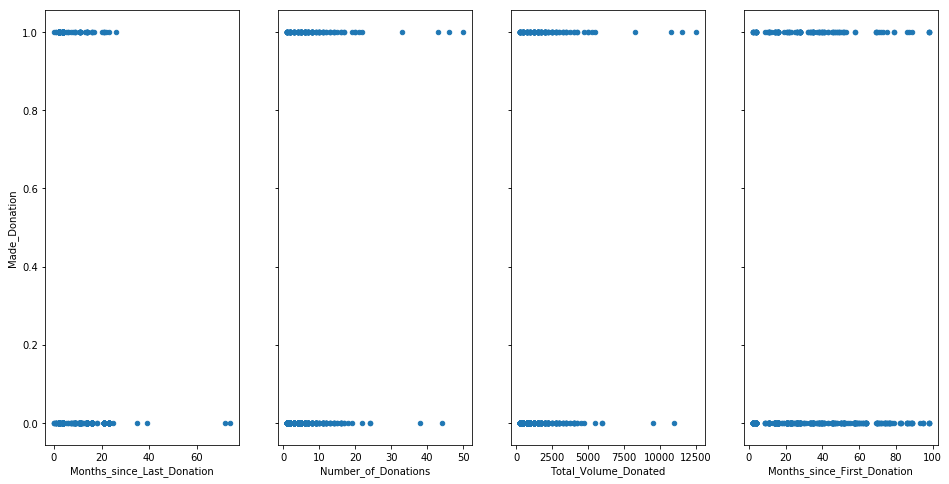

In [158]:
fig, axs = plt.subplots(1, 4, sharey=True)
data.plot(kind='scatter', x='Months_since_Last_Donation', y='Made_Donation', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Number_of_Donations', y='Made_Donation', ax=axs[1])
data.plot(kind='scatter', x='Total_Volume_Donated', y='Made_Donation', ax=axs[2])
data.plot(kind='scatter', x='Months_since_First_Donation', y='Made_Donation', ax=axs[3])

Patrząc na wykres możemy zauważyć "outliery", przed wykonaniem normalizacji danych zostaną one usunięte.

In [159]:
mean = data['Months_since_Last_Donation'].mean()
std = data['Months_since_Last_Donation'].std()
data = data[data.Months_since_Last_Donation > mean - 2*std]
data = data[data.Months_since_Last_Donation < mean + 2*std]

In [160]:
mean = data['Number_of_Donations'].mean()
std = data['Number_of_Donations'].std()
data = data[data.Number_of_Donations > mean - 2*std]
data = data[data.Number_of_Donations < mean + 2*std]

In [161]:
mean = data['Total_Volume_Donated'].mean()
std = data['Total_Volume_Donated'].std()
data = data[data.Total_Volume_Donated > mean - 2*std]
data = data[data.Total_Volume_Donated < mean + 2*std]

In [162]:
mean = data['Months_since_First_Donation'].mean()
std = data['Months_since_First_Donation'].std()
data = data[data.Months_since_First_Donation > mean - 2*std]
data = data[data.Months_since_First_Donation < mean + 2*std]

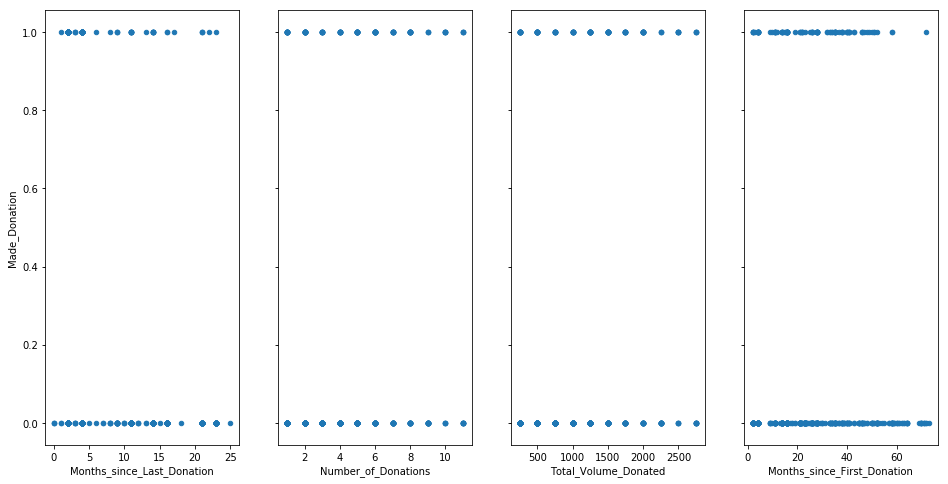

In [163]:
fig, axs = plt.subplots(1, 4, sharey=True)
data.plot(kind='scatter', x='Months_since_Last_Donation', y='Made_Donation', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Number_of_Donations', y='Made_Donation', ax=axs[1])
data.plot(kind='scatter', x='Total_Volume_Donated', y='Made_Donation', ax=axs[2])
data.plot(kind='scatter', x='Months_since_First_Donation', y='Made_Donation', ax=axs[3])

Widzimy, że po usunięciu outlierów pozbyliśmy się "odstających punktów"

Model 1. Regresja liniowa

In [164]:
from sklearn.linear_model import LinearRegression

In [165]:
feature_cols = ['Months_since_Last_Donation', 'Number_of_Donations', 'Total_Volume_Donated', 'Months_since_First_Donation']
x = data[feature_cols]
y = data.Made_Donation

lm = LinearRegression()
lm.fit(x, y)

print(lm.coef_)

[-9.07673298e-03  7.92651485e-07  1.98162871e-04 -4.97078815e-03]


In [166]:
zip(feature_cols, lm.coef_)

In [167]:
def linear_regression_predict(a):
    x = a['Months_since_Last_Donation']
    y = a['Number_of_Donations']
    z = a['Total_Volume_Donated']
    t = a['Months_since_First_Donation']

    result = lm.predict([[x,y,z,t]])[0]
    
    if result < 0:
        result = 0
    if result > 1:
        result = 1
    return result

In [168]:
test = pd.read_csv("testing.csv")
test['Made_Donation_Linear_Regression'] = test.apply(lambda row: linear_regression_predict(row), axis=1)
test

,id,Months_since_Last_Donation,Number_of_Donations,Total_Volume_Donated,Months_since_First_Donation,Made_Donation_Linear_Regression
0,659,2,12,3000,52,0.569280
1,276,21,7,1750,38,0.218705
2,263,4,1,250,4,0.244768
3,303,11,11,2750,38,0.507639
4,83,4,12,3000,34,0.640601
5,500,3,21,5250,42,1.000000
6,530,4,2,500,4,0.294309
7,244,14,1,250,14,0.104292
8,249,23,2,500,87,0.000000
9,728,14,4,1000,64,0.004378


In [172]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
import numpy as np

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

Model 2. Regresja z regularyzacją L1 (Lasso)

In [204]:
model_lasso = LassoCV()
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(x, y)
rmse_cv(model_lasso).min()

0.29295849229502385

In [205]:
coef = pd.Series(model_lasso.coef_, index = x.columns)

In [206]:
imp_coef = pd.concat([coef.sort_values()])

Text(0.5,1,'Coefficients in the Lasso Model')

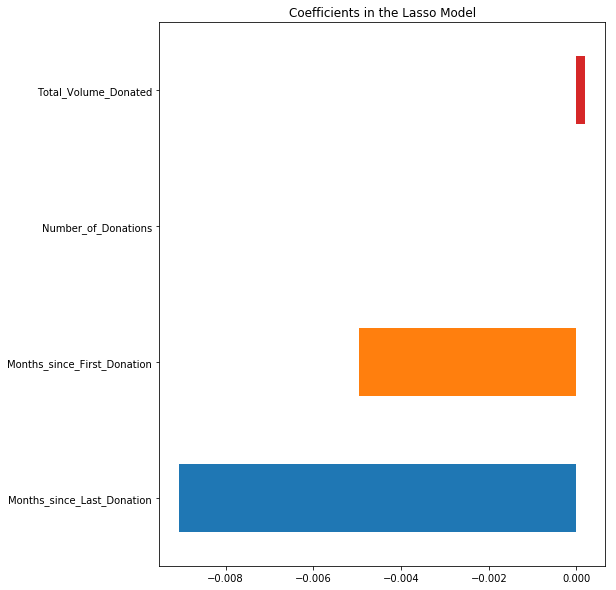

In [207]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [209]:
def lasso_predict(a):
    x = a['Months_since_Last_Donation']
    y = a['Number_of_Donations']
    z = a['Total_Volume_Donated']
    t = a['Months_since_First_Donation']

    result = model_lasso.predict([[x,y,z,t]])[0]
    
    if result < 0:
        result = 0
    if result > 1:
        result = 1
    return result

In [210]:
test['Made_Donation_Lasso'] = test.apply(lambda row:  lasso_predict(row), axis=1)
test

,id,Months_since_Last_Donation,Number_of_Donations,Total_Volume_Donated,Months_since_First_Donation,Made_Donation_Linear_Regression,Made_Donation_Lasso
0,659,2,12,3000,52,0.569280,0.569216
1,276,21,7,1750,38,0.218705,0.218981
2,263,4,1,250,4,0.244768,0.244625
3,303,11,11,2750,38,0.507639,0.507745
4,83,4,12,3000,34,0.640601,0.640570
5,500,3,21,5250,42,1.000000,1.000000
6,530,4,2,500,4,0.294309,0.294175
7,244,14,1,250,14,0.104292,0.104359
8,249,23,2,500,87,0.000000,0.000000
9,728,14,4,1000,64,0.004378,0.004494


Model 3. Regresja z regularyzacją L2 (Ridge)

In [186]:
model_ridge = Ridge()

In [187]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75, 100, 150]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0,0.5,'rmse')

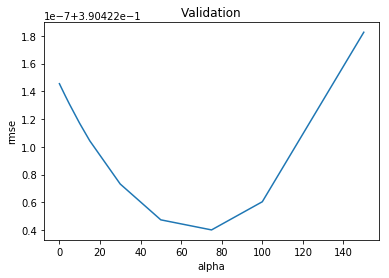

In [188]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [189]:
cv_ridge.min()

0.39042204014767146

In [214]:
model_ridge = Ridge(alpha=75).fit(x,y)

In [215]:
def ridge_predict(a):
    x = a['Months_since_Last_Donation']
    y = a['Number_of_Donations']
    z = a['Total_Volume_Donated']
    t = a['Months_since_First_Donation']

    result = model_ridge.predict([[x,y,z,t]])[0]
    
    if result < 0:
        result = 0
    if result > 1:
        result = 1
    return result

In [216]:
test['Made_Donation_Ridge'] = test.apply(lambda row: ridge_predict(row), axis=1)
test

,id,Months_since_Last_Donation,Number_of_Donations,Total_Volume_Donated,Months_since_First_Donation,Made_Donation_Linear_Regression,Made_Donation_Lasso,Made_Donation_Ridge
0,659,2,12,3000,52,0.569280,0.569216,0.569210
1,276,21,7,1750,38,0.218705,0.218981,0.219146
2,263,4,1,250,4,0.244768,0.244625,0.244588
3,303,11,11,2750,38,0.507639,0.507745,0.507877
4,83,4,12,3000,34,0.640601,0.640570,0.640655
5,500,3,21,5250,42,1.000000,1.000000,1.000000
6,530,4,2,500,4,0.294309,0.294175,0.294160
7,244,14,1,250,14,0.104292,0.104359,0.104403
8,249,23,2,500,87,0.000000,0.000000,0.000000
9,728,14,4,1000,64,0.004378,0.004494,0.004413


Możemy zauważyć, że wyniki dla wszystkich trzech modeli są bardzo podobne.